In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polar as pl
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

Data from https://www.kaggle.com/datasets/uciml/mushroom-classification

In [12]:
# Obtener la ruta del script actual
script_path = os.getcwd()

# Construir la ruta relativa al archivo CSV desde el script actual
path = os.path.join(script_path, 'mushrooms.csv')

data_mushroom=pd.read_csv(path,sep=",",quoting=3,header=1)
data_mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


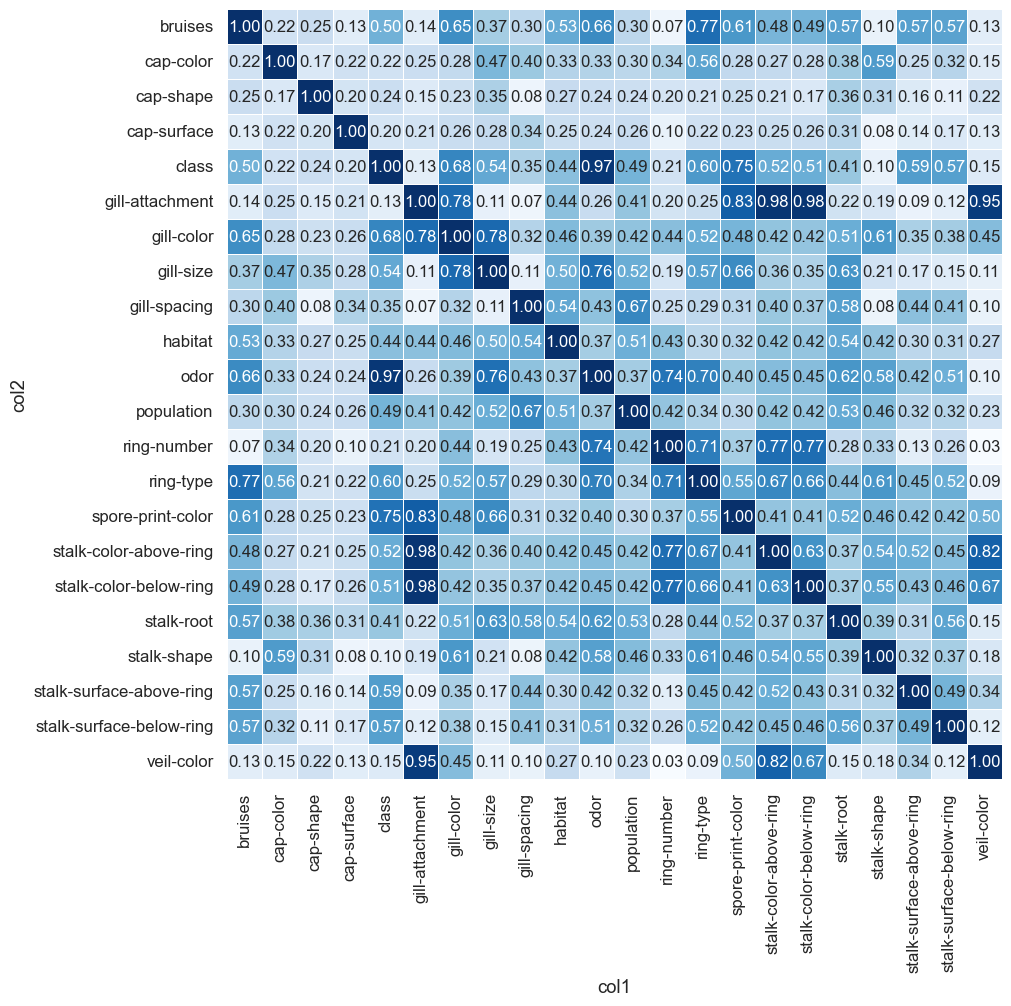

In [13]:
data_corr_df = pl.analyze_association(data_mushroom,'class',verbose=0)
pl.get_heatmap(data_corr_df,'association_heat_map.png',1.1,12,'0.2f',0,100,10,10)
sns.set_theme()
sns.set(style="whitegrid")

In [14]:
data_mushroom.loc[data_mushroom["class"] == "p", "class"] = 1
data_mushroom.loc[data_mushroom["class"] == "e", "class"] = 0
data_mushroom['class'] = data_mushroom['class'].astype(int)
df_dummies = pd.get_dummies(data_mushroom)
df_dummies

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8120,0,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
8121,0,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8122,1,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [15]:
data_mushroom.describe()

,class
count,8124.000000
mean,0.482029
std,0.499708
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Split into training and test

In [16]:
# Convert these lists to numpy arrays.
X = np.array(df_dummies.drop('class', axis=1))
y = np.array(df_dummies['class'])

'''# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]'''

'# Split into train and test data.\ntrain_data, train_labels = X[:7000], Y[:7000]\ntest_data, test_labels = X[7000:], Y[7000:]'

In [17]:
#20% Training 1625 rows of training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train KNN model

In [18]:
# Create a list of k values for KNN
k_values = np.arange(1, 5, 1)

# Train KNN models with different k values and store the results
knn_results = {}
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_results[k] = {
        'model': knn_model,
        'y_pred': y_pred_knn,
        'accuracy': accuracy_score(y_test, y_pred_knn)
    }


In [19]:
np.arange(250, 350, 3)

array([250, 253, 256, 259, 262, 265, 268, 271, 274, 277, 280, 283, 286,
       289, 292, 295, 298, 301, 304, 307, 310, 313, 316, 319, 322, 325,
       328, 331, 334, 337, 340, 343, 346, 349])

In [20]:
# Create a list of radius values for RNN
radius_values = np.arange(10, 50000, 5000)

# Train RNN models with different radius values and store the results
rnn_results = {}
for radius in radius_values:
    rnn_model = RadiusNeighborsClassifier(radius=radius)
    rnn_model.fit(X_train, y_train)
    y_pred_rnn = rnn_model.predict(X_test)
    rnn_results[radius] = {
        'model': rnn_model,
        'y_pred': y_pred_rnn,
        'accuracy': accuracy_score(y_test, y_pred_rnn)
    }

In [21]:
from sklearn.decomposition import PCA

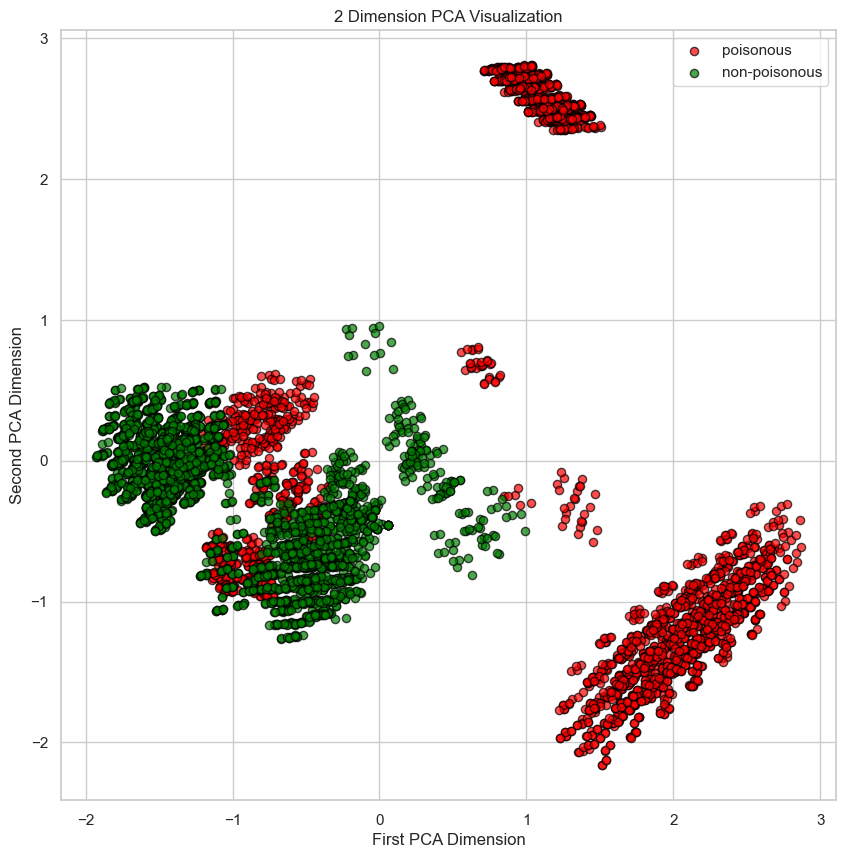

In [22]:
# Build PCA Model with 2 PCA Components
model = PCA(n_components = 2)
train_data_2dims = model.fit_transform(X_train)

# Graph Results
fig=plt.figure(figsize=(10,10))
plt.scatter(train_data_2dims[:,0][y_train==1],train_data_2dims[:,1][y_train==1],marker="o",color='red', label="poisonous",edgecolor='black',s=35,alpha=0.7)
plt.scatter(train_data_2dims[:,0][y_train==0],train_data_2dims[:,1][y_train==0],marker="o",color='green', label="non-poisonous",edgecolor='black',s=35,alpha=0.7)    
plt.xlabel("First PCA Dimension")
plt.ylabel("Second PCA Dimension")
plt.legend()
plt.title("2 Dimension PCA Visualization")
plt.show()

## Compare the performance of KNN and RNN models.

In [23]:
# Print the accuracy of KNN models
print("KNN Accuracy:")
for k, result in knn_results.items():
    print(f"K = {k}: {result['accuracy']:.2f}")

# Print the accuracy of RNN models
print("\nRNN Accuracy:")
for radius, result in rnn_results.items():
    print(f"Radius = {radius}: {result['accuracy']:.2f}")

KNN Accuracy:
K = 1: 1.00
K = 2: 1.00
K = 3: 1.00
K = 4: 1.00

RNN Accuracy:
Radius = 10: 0.50
Radius = 5010: 0.50
Radius = 10010: 0.50
Radius = 15010: 0.50
Radius = 20010: 0.50
Radius = 25010: 0.50
Radius = 30010: 0.50
Radius = 35010: 0.50
Radius = 40010: 0.50
Radius = 45010: 0.50


# Visualize predictions

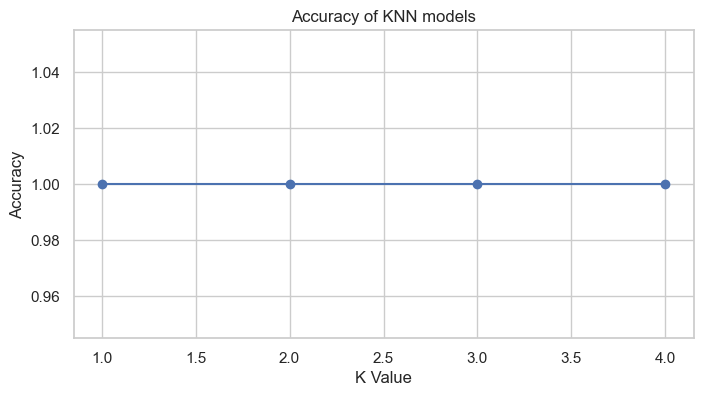

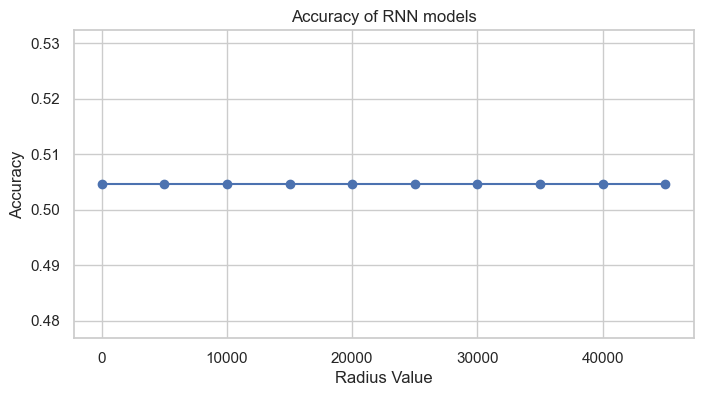

In [24]:
# Visualize the accuracy of KNN models
k_values = [k for k in knn_results.keys()]
k_accuracies = [result['accuracy'] for result in knn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models')
plt.grid(True)
plt.show()

# Visualize the accuracy of RNN models
radius_values = [radius for radius in rnn_results.keys()]
radius_accuracies = [result['accuracy'] for result in rnn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(radius_values, radius_accuracies, marker='o')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of RNN models')
plt.grid(True)
plt.show()